In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [100]:
train_file = r"E:\Machine Learning\Hackathon\Hackathon\Hackathon\CreditCardFraud\credit_train.csv"
test_file = r"E:\Machine Learning\Hackathon\Hackathon\Hackathon\CreditCardFraud\credit_test.csv"

In [101]:
train_Data = pd.read_csv(train_file)
test_Data = pd.read_csv(test_file)

In [102]:
train_Data.shape

(227845, 30)

In [103]:
test_Data.shape

(56962, 30)

In [6]:
train_Data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.456417,1.327516,-0.635254,-2.765440,0.282230,-0.758234,0.365270,0.927673,0.033947,-1.138995,...,-0.268150,-1.027990,-0.123132,-1.147477,0.058896,0.434728,0.067085,0.072365,4.0,'0'
1,-0.879383,1.138867,0.834804,0.904867,0.164135,-0.486903,0.286551,0.437374,-0.751725,-0.293550,...,0.208368,0.597398,-0.073658,0.098907,-0.232732,-0.289270,0.314182,0.120301,11.8,'0'
2,1.270210,-0.755504,1.070372,-0.745716,-1.365979,-0.049645,-1.197854,0.207163,-0.677824,0.731290,...,0.475541,1.321484,-0.061854,0.280606,0.297015,-0.050341,0.050163,0.014809,14.0,'0'
3,1.967062,0.445029,-2.472415,1.290097,1.284233,-0.398478,0.641294,-0.209637,-0.219990,-0.224304,...,0.011025,0.184953,-0.079679,0.188458,0.516061,-0.521453,-0.005402,-0.030380,32.0,'0'
4,-0.626555,1.218109,0.871426,0.950972,-0.311923,-0.711223,0.686529,0.214618,-0.916320,-0.506793,...,0.237543,0.529095,0.015473,0.401008,-0.195985,-0.335558,0.031509,0.106962,64.9,'0'


In [7]:
train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 30 columns):
V1        227845 non-null float64
V2        227845 non-null float64
V3        227845 non-null float64
V4        227845 non-null float64
V5        227845 non-null float64
V6        227845 non-null float64
V7        227845 non-null float64
V8        227845 non-null float64
V9        227845 non-null float64
V10       227845 non-null float64
V11       227845 non-null float64
V12       227845 non-null float64
V13       227845 non-null float64
V14       227845 non-null float64
V15       227845 non-null float64
V16       227845 non-null float64
V17       227845 non-null float64
V18       227845 non-null float64
V19       227845 non-null float64
V20       227845 non-null float64
V21       227845 non-null float64
V22       227845 non-null float64
V23       227845 non-null float64
V24       227845 non-null float64
V25       227845 non-null float64
V26       227845 non-null float64
V27  

In [104]:
train_Data["Source"] = "Train"
test_Data["Source"] = "Test"

In [105]:
final_data = pd.concat([train_Data,test_Data])

In [10]:
final_data.shape

(284807, 31)

In [11]:
final_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Source
0,-1.456417,1.327516,-0.635254,-2.765440,0.282230,-0.758234,0.365270,0.927673,0.033947,-1.138995,...,-1.027990,-0.123132,-1.147477,0.058896,0.434728,0.067085,0.072365,4.0,'0',Train
1,-0.879383,1.138867,0.834804,0.904867,0.164135,-0.486903,0.286551,0.437374,-0.751725,-0.293550,...,0.597398,-0.073658,0.098907,-0.232732,-0.289270,0.314182,0.120301,11.8,'0',Train
2,1.270210,-0.755504,1.070372,-0.745716,-1.365979,-0.049645,-1.197854,0.207163,-0.677824,0.731290,...,1.321484,-0.061854,0.280606,0.297015,-0.050341,0.050163,0.014809,14.0,'0',Train
3,1.967062,0.445029,-2.472415,1.290097,1.284233,-0.398478,0.641294,-0.209637,-0.219990,-0.224304,...,0.184953,-0.079679,0.188458,0.516061,-0.521453,-0.005402,-0.030380,32.0,'0',Train
4,-0.626555,1.218109,0.871426,0.950972,-0.311923,-0.711223,0.686529,0.214618,-0.916320,-0.506793,...,0.529095,0.015473,0.401008,-0.195985,-0.335558,0.031509,0.106962,64.9,'0',Train


In [12]:
final_data.duplicated().sum()

7101

In [106]:
final_data.drop_duplicates(inplace = True)

In [107]:
final_data.duplicated().sum()

0

In [15]:
final_data.isna().sum()


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Source    0
dtype: int64

In [108]:
final_data["Class"].value_counts()

'0'    277230
'1'       476
Name: Class, dtype: int64

In [109]:
final_data["Class"].replace({"'0'": 0, "'1'": 1},inplace = True)

In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277706 entries, 0 to 56961
Data columns (total 31 columns):
V1        277706 non-null float64
V2        277706 non-null float64
V3        277706 non-null float64
V4        277706 non-null float64
V5        277706 non-null float64
V6        277706 non-null float64
V7        277706 non-null float64
V8        277706 non-null float64
V9        277706 non-null float64
V10       277706 non-null float64
V11       277706 non-null float64
V12       277706 non-null float64
V13       277706 non-null float64
V14       277706 non-null float64
V15       277706 non-null float64
V16       277706 non-null float64
V17       277706 non-null float64
V18       277706 non-null float64
V19       277706 non-null float64
V20       277706 non-null float64
V21       277706 non-null float64
V22       277706 non-null float64
V23       277706 non-null float64
V24       277706 non-null float64
V25       277706 non-null float64
V26       277706 non-null float64
V27   

In [19]:
correlation = final_data.corr()
print(correlation["Class"].sort_values(ascending = False))

Class     1.000000
V11       0.151838
V4        0.130980
V2        0.085632
V19       0.034080
V8        0.032901
V21       0.025558
V20       0.021785
V27       0.020144
V28       0.009378
Amount    0.005621
V22       0.004990
V26       0.004327
V25       0.003514
V15      -0.003141
V13      -0.003972
V23      -0.006331
V24      -0.006823
V6       -0.044923
V5       -0.090037
V9       -0.095444
V1       -0.095893
V18      -0.107323
V7       -0.175670
V3       -0.187325
V16      -0.189682
V10      -0.210211
V12      -0.254559
V14      -0.298092
V17      -0.319082
Name: Class, dtype: float64


In [110]:
train_final = final_data[final_data["Source"] == 'Train']
test_final = final_data[final_data["Source"] == 'Test']

In [111]:
train_final.drop(columns=["Source"],inplace = True)
test_final.drop(columns=["Source"],inplace = True)

In [112]:
train_X = train_final.drop(columns = ["Class","V15","V13","V23","V24","V6","V5","V9","V1","V18","V7","V3","V16","V10","V12","V14","V17"])
train_Y = train_final[["Class"]]
test_X = test_final.drop(columns = ["Class","V15","V13","V23","V24","V6","V5","V9","V1","V18","V7","V3","V16","V10","V12","V14","V17"])
test_Y = test_final[["Class"]]

In [23]:
train_X.shape

(221447, 13)

In [24]:
test_X.shape

(56259, 13)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import f1_score
logreg = LogisticRegression()
logreg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
train_predict = logreg.predict(train_X)
test_predict = logreg.predict(test_X)

In [27]:
metrics.confusion_matrix(train_Y,train_predict)

array([[221041,     29],
       [   194,    183]], dtype=int64)

In [28]:
logreg_F1_train = f1_score(train_Y,train_predict)
print("F1-Score -Train :{:.2f}".format(logreg_F1_train))
logreg_F1_test = f1_score(test_Y,test_predict)
print("F1-Score -Test :{:.2f}".format(logreg_F1_test))

F1-Score -Train :0.62
F1-Score -Test :0.53


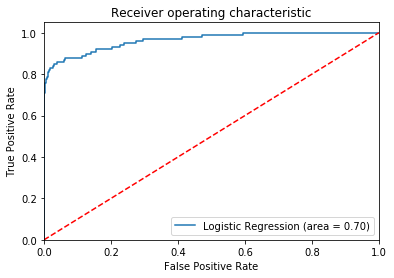

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_Y, logreg.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_Y, logreg.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Scaling - StandardScaler

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_X)
test_scaled = scaler.transform(test_X)

# KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(train_scaled,train_Y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
train_predict = neigh.predict(train_scaled)
test_predict = neigh.predict(test_scaled)

In [33]:
metrics.confusion_matrix(train_Y,knn_train_predict)

array([[221063,      7],
       [   139,    238]], dtype=int64)

In [ ]:
knn_F1_train = f1_score(train_Y,train_predict)
print("F1-Score -Train :{:.2f}".format(knn_F1_train))
knn_F1_test = f1_score(test_Y,test_predict)
print("F1-Score -Test :{:.2f}".format(knn_F1_test))

# NaiveBayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()

In [35]:
nbc.fit(train_scaled,train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
train_predict = nbc.predict(train_scaled)
test_predict = nbc.predict(test_scaled)

In [38]:
metrics.confusion_matrix(train_Y,train_predict)

array([[215696,   5374],
       [   152,    225]], dtype=int64)

In [39]:
nbc_F1_train = f1_score(train_Y,train_predict)
print("F1-Score -Train :{:.2f}".format(nbc_F1_train))
nbc_F1_test = f1_score(test_Y,test_predict)
print("F1-Score -Test :{:.2f}".format(nbc_F1_test))

F1-Score -Train :0.08
F1-Score -Test :0.08


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [41]:
dt.fit(train_scaled,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
train_predict = dt.predict(train_scaled)

In [42]:
test_predict = dt.predict(test_scaled)

In [43]:
train_score = f1_score(train_Y,train_predict)
train_score

0.6057692307692307

In [ ]:
test_score = f1_score(test_Y,test_predict)
test_score

Fine Tuning

In [44]:
def fit_predict(train_scaled, test_scaled, y_train_Y, test_Y,max_depth, 
                criterion = 'entropy', max_features = 1, min_samples_split = 4):
            
    dt = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth, 
                                 max_features=max_features,
                               min_samples_split=min_samples_split)
    dt.fit(train_scaled, train_Y)
    y_pred = dt.predict(test_scaled)
    print(f1_score(test_Y, y_pred))

Max Depth Tuning

In [47]:
for i in range(1, 20):
    print('F1 score using max_depth =', i, end = ': ')
    fit_predict(train_scaled, test_scaled, train_Y, test_Y, i)

F1 score using max_depth = 1: 0.0
F1 score using max_depth = 2: 0.0
F1 score using max_depth = 3: 0.0
F1 score using max_depth = 4: 0.14953271028037382
F1 score using max_depth = 5: 0.0
F1 score using max_depth = 6: 0.4
F1 score using max_depth = 7: 0.26890756302521013
F1 score using max_depth = 8: 0.35384615384615387
F1 score using max_depth = 9: 0.6547619047619048
F1 score using max_depth = 10: 0.5149700598802396
F1 score using max_depth = 11: 0.5895953757225434
F1 score using max_depth = 12: 0.44970414201183434
F1 score using max_depth = 13: 0.49717514124293777
F1 score using max_depth = 14: 0.5280898876404494
F1 score using max_depth = 15: 0.5433526011560694
F1 score using max_depth = 16: 0.37349397590361444
F1 score using max_depth = 17: 0.5513513513513513
F1 score using max_depth = 18: 0.4891304347826087
F1 score using max_depth = 19: 0.3891891891891892


Max Features Tuning

In [49]:
for i in np.arange(0.1, 1.0, 0.1):
    print('F1 score using max features =', i, end = ': ')
    fit_predict(train_scaled, test_scaled, train_Y, test_Y, max_depth = 9, max_features=i)

F1 score using max features = 0.1: 0.4090909090909091
F1 score using max features = 0.2: 0.6049382716049383
F1 score using max features = 0.30000000000000004: 0.689655172413793
F1 score using max features = 0.4: 0.6979166666666667
F1 score using max features = 0.5: 0.6881720430107527
F1 score using max features = 0.6: 0.6844919786096257
F1 score using max features = 0.7000000000000001: 0.6914893617021276
F1 score using max features = 0.8: 0.7078651685393258
F1 score using max features = 0.9: 0.6595744680851064


Min Samples Split Tuning

In [51]:
for i in range(2, 10):
    print('F1 score using min samples split =', i, end = ': ')
    fit_predict(train_scaled, test_scaled, train_Y, test_Y, 9, max_features=0.8, min_samples_split=i)

F1 score using min samples split = 2: 0.7135135135135136
F1 score using min samples split = 3: 0.66
F1 score using min samples split = 4: 0.6736842105263158
F1 score using min samples split = 5: 0.6737967914438503
F1 score using min samples split = 6: 0.670391061452514
F1 score using min samples split = 7: 0.721311475409836
F1 score using min samples split = 8: 0.6735751295336788
F1 score using min samples split = 9: 0.6847826086956522


Criterion Tuning

In [55]:
for i in ['gini', 'entropy']:
    print('F1 score using criterion =', i, end = ': ')
    fit_predict(train_scaled, test_scaled, train_Y, test_Y, 9, 
                max_features=0.8, min_samples_split=7, criterion = 'entropy')

F1 score using criterion = gini: 0.6989247311827956
F1 score using criterion = entropy: 0.6850828729281768


After Tuning:

In [56]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=9, 
                                 max_features=0.8,
                               min_samples_split=7)

In [57]:
dt.fit(train_scaled,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
train_predict = dt.predict(train_X)


In [ ]:
test_predict = dt.predict(test_X)

In [59]:
metrics.confusion_matrix(train_Y,train_predict)

array([[220806,    264],
       [   135,    242]], dtype=int64)

In [60]:
dt_F1_train = f1_score(train_Y,train_predict)
print("F1-Score -Train :{:.2f}".format(dt_F1_train))
dt_F1_test = f1_score(test_Y,test_predict)
print("F1-Score -Test :{:.2f}".format(dt_F1_test))

F1-Score -Train :0.55
F1-Score -Test :0.55


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(train_scaled,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
train_predict = RF.predict(train_scaled)


In [70]:
test_predict = RF.predict(test_scaled)

In [71]:
metrics.confusion_matrix(train_Y,train_predict)

array([[221069,      1],
       [    30,    347]], dtype=int64)

In [72]:
train_score = f1_score(train_Y,train_predict)

train_score


0.9572413793103448

In [73]:
test_score = f1_score(test_Y,test_predict)
test_score

0.6878980891719746

Fine Tuning

In [74]:
def fit_predict(train_scaled, test_scaled, train_Y, test_Y,  max_depth = None , 
                n_estimators = 10, max_features = 'auto', min_samples_split = 2,scaler = None):
            
    RF = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, 
                                random_state = 42, max_features = max_features,
                               min_samples_split = min_samples_split)
    RF.fit(train_scaled, train_Y)
    y_pred = RF.predict(test_scaled)
    print(f1_score(test_Y, y_pred))

Number of Trees - n_estimators

In [75]:
for n_estimators in range(20,200,20):
    print('F1 score using n_estimators =', n_estimators, end = ': ')
    fit_predict(train_scaled,test_scaled,train_Y,test_Y,n_estimators = n_estimators)

F1 score using n_estimators = 20: 0.736196319018405
F1 score using n_estimators = 40: 0.7590361445783133
F1 score using n_estimators = 60: 0.7515151515151516
F1 score using n_estimators = 80: 0.7590361445783133
F1 score using n_estimators = 100: 0.7590361445783133
F1 score using n_estimators = 120: 0.7590361445783133
F1 score using n_estimators = 140: 0.7664670658682635
F1 score using n_estimators = 160: 0.7738095238095237
F1 score using n_estimators = 180: 0.7738095238095237


In [ ]:
Max Depth

In [76]:
for max_depth in range(1,20):
    print('F1 score using max_depth =', max_depth, end = ': ')
    fit_predict(train_scaled,test_scaled,train_Y,test_Y,n_estimators = 160,max_depth = max_depth)

F1 score using max_depth = 1: 0.0
F1 score using max_depth = 2: 0.12962962962962962
F1 score using max_depth = 3: 0.4274809160305343
F1 score using max_depth = 4: 0.5531914893617021
F1 score using max_depth = 5: 0.5874125874125874
F1 score using max_depth = 6: 0.6357615894039735
F1 score using max_depth = 7: 0.6357615894039735
F1 score using max_depth = 8: 0.6835443037974683
F1 score using max_depth = 9: 0.7
F1 score using max_depth = 10: 0.7160493827160492
F1 score using max_depth = 11: 0.7439024390243902
F1 score using max_depth = 12: 0.7317073170731707
F1 score using max_depth = 13: 0.7469879518072289
F1 score using max_depth = 14: 0.7469879518072289
F1 score using max_depth = 15: 0.7664670658682635
F1 score using max_depth = 16: 0.7664670658682635
F1 score using max_depth = 17: 0.7692307692307693
F1 score using max_depth = 18: 0.7692307692307693
F1 score using max_depth = 19: 0.7692307692307693


Max Featuresx

In [77]:
for max_features in np.linspace(0.1,1,10):
    print('F1 score using max_features =', max_features, end = ': ')
    fit_predict(train_scaled,test_scaled,train_Y,test_Y,n_estimators = 160,max_features = max_features,max_depth = 15)

F1 score using max_features = 0.1: 0.6216216216216216
F1 score using max_features = 0.2: 0.7006369426751592
F1 score using max_features = 0.30000000000000004: 0.7664670658682635
F1 score using max_features = 0.4: 0.764705882352941
F1 score using max_features = 0.5: 0.7719298245614035
F1 score using max_features = 0.6: 0.7764705882352941
F1 score using max_features = 0.7000000000000001: 0.7719298245614035
F1 score using max_features = 0.8: 0.7816091954022988
F1 score using max_features = 0.9: 0.7816091954022988
F1 score using max_features = 1.0: 0.7906976744186046


Min Samples

In [78]:
for min_samples_split in range(2,10):
    print('F1 score using min_samples_split =', min_samples_split, end = ': ')
    fit_predict(train_scaled,test_scaled,train_Y,test_Y,n_estimators = 160,max_features = 0.6,min_samples_split=min_samples_split
               ,max_depth = 15)

F1 score using min_samples_split = 2: 0.7764705882352941
F1 score using min_samples_split = 3: 0.764705882352941
F1 score using min_samples_split = 4: 0.7764705882352941
F1 score using min_samples_split = 5: 0.7764705882352941
F1 score using min_samples_split = 6: 0.764705882352941
F1 score using min_samples_split = 7: 0.7692307692307693
F1 score using min_samples_split = 8: 0.7719298245614035
F1 score using min_samples_split = 9: 0.7764705882352941


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 160, max_depth=15,random_state = 42, max_features = 0.6,
                               min_samples_split = 5)

In [85]:
rf.fit(train_scaled, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
train_predict = rf.predict(train_scaled)
test_predict = rf.predict(test_scaled)

In [87]:
rf_F1_train = f1_score(train_Y,train_predict)
print("F1-Score -Train :{:.2f}".format(rf_F1_train))
rf_F1_test = f1_score(test_Y,test_predict)
print("F1-Score -Test :{:.2f}".format(rf_F1_test))

F1-Score -Train :0.91
F1-Score -Test :0.78
